# Notebook  8 - Simulated Annealing

Questa lezione contiene un esempio di Simulated Annealing applicato ad un Hamiltoniana con un potenziale. L'obiettivo è, tramite principi variazionali, determinare i parametri della funzione d'onda di una particella unidimensionale che minimizzano l'energia dello stato fondamentale.

   - [  8.1 - Calcolo dell'integrale ](#ex-8.1) 
   
   - [  8.2 - Simulated Annealing ](#ex-8.2)
   

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

<a id="ex-8.1"></a>
## Esercizio 8.1. - Calcolo dell'integrale
Secondo i principi variazionali della meccanica quantistica, è noto che il valore medio dell'Hamiltoniana nel ground state è un limite inferiore nello spazio delle funzioni d'onda. Dunque vale che

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

Dove $\Psi_T$ è una funzione d'onda qualsiasi e $\Psi_0$ la funzione d'onda del ground state. L'obiettivo di questo Notebook è determinare $\Psi_0$ nel caso del potenziale unidimensionale:

$$
V(x) = x^4 - \frac{5}{2}x^2
$$

Dato che il problema non è risolvibile analiticamente, il procedimento consiste nell'utilizzare una funzione d'onda di prova, costruita nel modo seguente:

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

L'obiettivo sarà determinare i parametri $\mu$ e $\sigma$ che minimizzano l'energia.

Il procedimento utilizzato si fonda sull'algoritmo di Metropolis applicato alla funzione d'onda $\Psi_T(x)$. Si nota infatti che la struttura dell'integrale:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

ricalca quella di un integrale con uniform sampling, dove il ruolo del modulo quadro della funzione d'onda $|\Psi_T(x)|^2$ è proprio quello di una distribuzione di probabilità (è infatti normalizzata). Verranno quindi estratte secondo questa distribuzione di probabilità le $x$ nelle quali calcolare poi l'integranda. L'algoritmo di Metropolis viene utilizzato con una probabilità di transizione uniforme $T(x_{new}|x_{old})$. </br>
Il calcolo dell'Hamiltoniana è stato implementato con il solito metodo di data blocking in una funzione `MeasureAverageH()`, che verrà ampiamente utilizzata nell'esercizio seguente.

<a id="ex-8.2"></a>
## Esercizio 8.2. - Simulated Annealing
La chiave della minimizzazione è muoversi nello spazio dei parametri definito da $\mu$ e $\sigma$, fino a trovare quelli che minimizzano il valore dell'integrale. Per regolare questo movimento si introduce una <i> funzione di costo </i>, ovvero una funzione che quantifichi la bontà del punto nello spazio dei parametri scelto. L'integrale stesso offre un candidato ottimale per questa funzione di costo, dato che l'obiettivo è minimizzare il suo valore. Il procedimento, che prende il nome di <i> simulated annealing </i>, è ispirato al raffreddamento di un metallo ed è strutturato nella maniera seguente:

-  Viene introdotto un parametro $\beta$, che rappresenta la temperatura del sistema. Questa temperatura ha il senso di rappresentare la vicinanza all'equilibrio del sistema. Partendo da $\beta = 1$, il sistema viene fatto equilibrare (ovvero viene calcolato l'integrale con diversi valori di $\mu$ e $\sigma$), per poi passare alla temperatura successiva e ripetere il procedimento. Una volta che si è raggiunta la temperatura finale, selezionata come temperatura di equilibrio, la simulazione finisce. Ispirandosi alla costante $\beta = \frac{1}{k_B T}$, la legge di aggiornamento della temperatura è stata scelta essere $\beta = \beta_{old} + d\beta$, con $d\beta > 0$ selezionabile da un file `input.dat`.
- Per ogni temperatura, vengono estratti dei tentativi di $\mu$ e $\sigma$. L'estrazione è fatta casualmente entro un range impostabile da `input.dat`. Il tentativo viene accettato se porta ad un'energia minore, utilizzando il peso di Gibbs $e^{-\beta \Delta H}$. Dato che questo procedimento consiste in una discesa del gradiente, si è pensato di sfruttare il parametro $\beta$ anche in questa situazione. Esso rappresenta la vicinanza all'equilibrio, dunque ci si aspetta che l'esplorazione nello spazio dei parametri debba essere tanto più piccola quanto $\beta$ si alza. Si è quindi limitata l'esporazione dividendo per $\beta$ il range di esplorazione. Questa limitazione non inficia la simulazione perchè le mosse in range più grandi verrebbero comunque rifiutate, ma migliora la convergenza limitando gli allontanamenti dall'equilibrio.

Una volta raggiunta la temperatura limite, fissata per scelta a $\beta = 500$, sono stati trovati i seguenti risultati:

$$
E_0 = - 0.449707 \pm 0.00836267, \mu = \pm 0.791301, \sigma = \pm 0.65448
$$

I valori di $\mu$ e $\sigma$ vengono forniti con $\pm$ perchè essendo simmetrica la funzione d'onda rispetto ad essi è possibile trovarli entrambi indifferentemente.
Il grafico mostra l'evoluzione dei valori di $H$, il cui errore è stato determinato attraverso il data blocking. Per questo calcolo sono stati utilizzati i parametri ottimali determinati attraverso il simulated annealing, con $500$ blocchi da da $1000$ passi ciascuno.

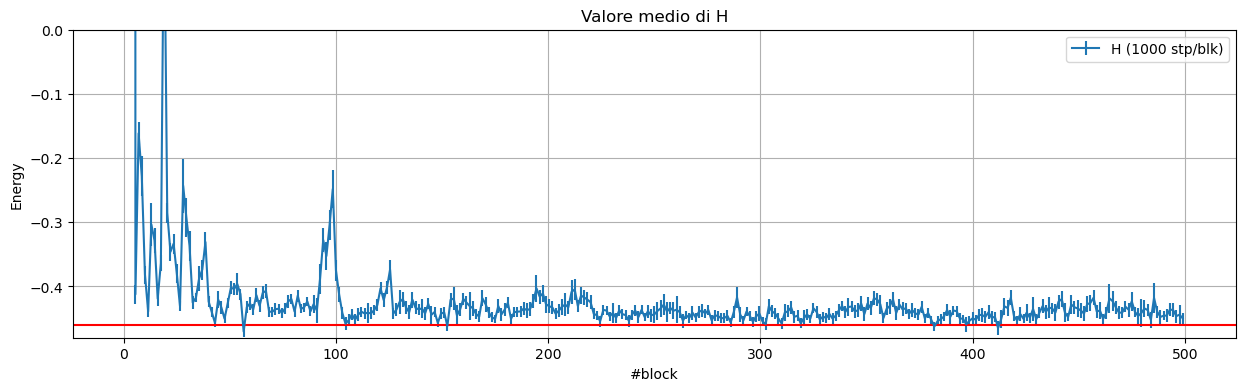

In [2]:
x_1, sum_prog_1, err_prog_1 = np.loadtxt("Exercise08-1/output/traj_def.out", usecols =(0,3,4), unpack = 'true')

plt.figure(figsize=(15,4))
plt.errorbar(x_1, sum_prog_1, err_prog_1, label='H (1000 stp/blk)')
plt.title("Valore medio di H")
plt.ylabel("Energy")
plt.xlabel("#block")
plt.ylim(-0.48, 0)
plt.axhline(y= - 0.46046587969271513, color = 'r', linestyle = '-')
plt.legend()
plt.grid(True)


I seguenti grafici mostrano invece l'evoluzione nello spazio dei parametri. Il primo grafico è un istogramma che mostra la frequenza dei valori di $\mu$ e $\sigma$ trovati. Si nota che l'esplorazione si concentra nella zona colorata con colori più caldi, perchè le mosse che portano fuori da questa zona non vengono accettate. </br> Il secondo grafico mostra la stessa traiettoria mettendo sull'asse $z$ il valore dell'Hamiltoniana, usata come funzione di costo. Si vede come la minimizzazione di tale valore sia il discrimine per l'accettazione o meno delle mosse.

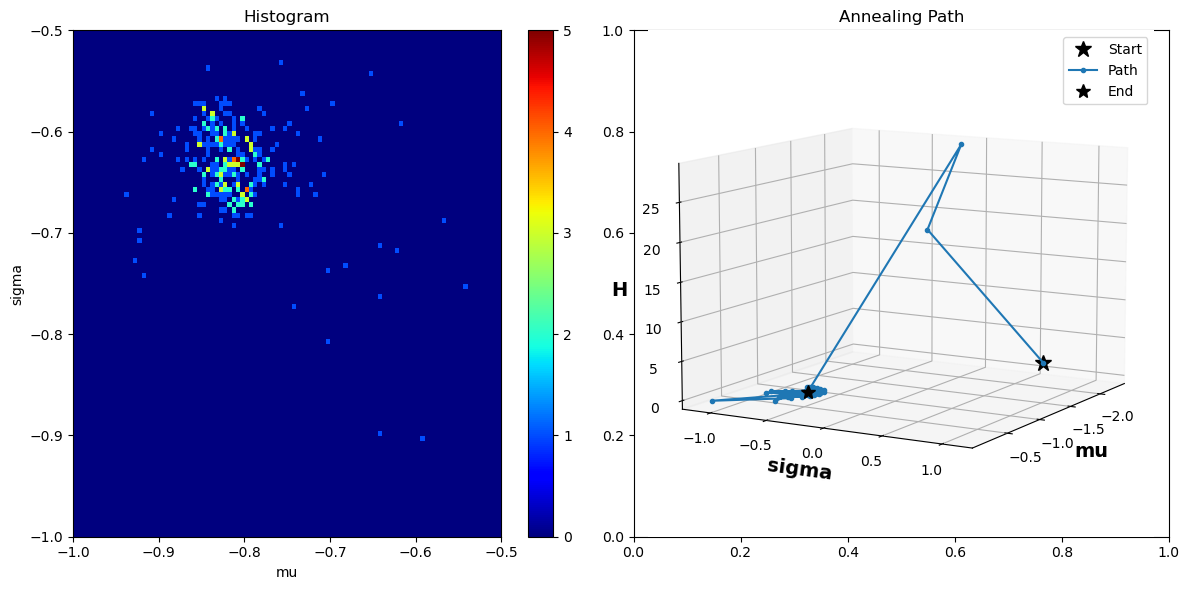

Best mu = -0.791301
Best sigma = -0.65448
Best H = -0.449707


In [3]:
mu, sigma, H = np.loadtxt("Exercise08-1/output/traj_def.out", usecols=(1, 2, 3), unpack='true')

bin_range = [[-1, -0.5], [-1, -0.5]]
hist, xedges, yedges = np.histogram2d(mu, sigma, bins=100, range=bin_range)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
im = axs[0].imshow(hist.T, cmap=plt.cm.jet, origin='lower', extent=extent, aspect='auto')
axs[0].set_xlabel('mu')
axs[0].set_ylabel('sigma')
axs[0].set_title('Histogram')
fig.colorbar(im, ax=axs[0])

axs[1] = fig.add_subplot(122, projection='3d')
axs[1].plot(mu[0], sigma[0], H[0], marker='*', markersize=12, color="black", label="Start", linestyle="")
axs[1].plot(mu, sigma, H, marker='.', linestyle="-", label="Path")
axs[1].plot(mu[-1], sigma[-1], H[-1], marker='*', markersize=10, color="black", label="End", linestyle="")
axs[1].set_xlabel('mu', fontweight="bold", fontsize=14)
axs[1].set_ylabel('sigma', fontweight="bold", fontsize=14)
axs[1].set_zlabel('H', fontweight="bold", fontsize=14)
axs[1].set_title('Annealing Path')
axs[1].legend()
axs[1].view_init(10, 30)

plt.tight_layout()
plt.show()

best_mu = mu[-1]
best_sigma = sigma[-1]
best_H = H[-1]

print("Best mu =", best_mu)
print("Best sigma =", best_sigma)
print("Best H =", best_H)

 <a id="osc"></a> Il secondo grafico mostra con evidenza che i primi passi sono molto lontani dall'equilibrio, ma la zona di minimo viene raggiunta molto rapidamente, e una volta raggiunta le esplorazioni non si distaccano più di molto. Questa rapidità di convergenza è dovuta al fatto che le esplorazioni sono state limitate dall'aumentare di $\beta$. Se questa regola ulteriore non fosse stata implementata, il minimo sarebbe stato raggiunto comunque, ma con molte più oscillazioni. Per verificare la veridicità di quest'affermazione si è provato a modificare il codice, togliendo la regola sulla restrizione del range di esplorazione. Si è scelto quindi di implementare un range di esplorazione costante di $\delta_\mu = \delta_\sigma = 0.05$. I risultati sono compatibili con la previsione: viene raggiunto comunque un punto di minimo simile al precedente (si è già detto che il segno è ininfluente), ma con oscillazioni molto più marcate.

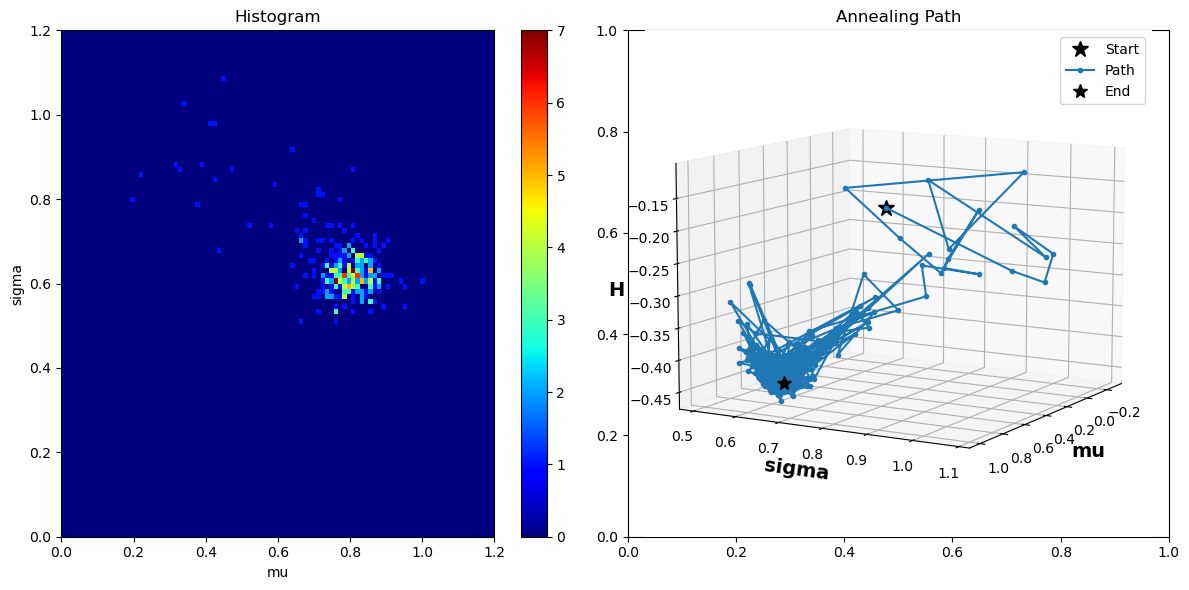

Best mu = 0.800343
Best sigma = 0.628822
Best H = -0.440505


In [4]:
mu_2, sigma_2, H_2 = np.loadtxt("Exercise08-1/output/traj_nobeta.out", usecols=(1, 2, 3), unpack='true')

bin_range = [[0, 1.2], [0, 1.2]]
hist, xedges, yedges = np.histogram2d(mu_2, sigma_2, bins=100, range=bin_range)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
im = axs[0].imshow(hist.T, cmap=plt.cm.jet, origin='lower', extent=extent, aspect='auto')
axs[0].set_xlabel('mu')
axs[0].set_ylabel('sigma')
axs[0].set_title('Histogram')
fig.colorbar(im, ax=axs[0])

axs[1] = fig.add_subplot(122, projection='3d')
axs[1].plot(mu_2[0], sigma_2[0], H_2[0], marker='*', markersize=12, color="black", label="Start", linestyle="")
axs[1].plot(mu_2, sigma_2, H_2, marker='.', linestyle="-", label="Path")
axs[1].plot(mu_2[-1], sigma_2[-1], H_2[-1], marker='*', markersize=10, color="black", label="End", linestyle="")
axs[1].set_xlabel('mu', fontweight="bold", fontsize=14)
axs[1].set_ylabel('sigma', fontweight="bold", fontsize=14)
axs[1].set_zlabel('H', fontweight="bold", fontsize=14)
axs[1].set_title('Annealing Path')
axs[1].legend()
axs[1].view_init(10, 30)

plt.tight_layout()
plt.show()

best_mu = mu_2[-1]
best_sigma = sigma_2[-1]
best_H = H_2[-1]

print("Best mu =", best_mu)
print("Best sigma =", best_sigma)
print("Best H =", best_H)

### Errore su $\mu$ e $\sigma$ 

Come si è detto nella sezione precedente, l'errore su $H$ viene fornito dal data blocking. Invece, il simulated annealing non fornisce alcun valore di errore per i parametri. Per inferire una qualche incertezza si è quindi operato nella maniera seguente. Una volta raggiunto il valore finale della temperatura, sono state fatte 1000 mosse per $\mu$ e $\sigma$, supponendo che i valori dovessero distribuirsi secondo una gaussiana. Secondo questa supposizione, che i grafici mostrano essere abbastanza verosimile, il valore di $\mu$ e $\sigma$ fornito con il rispettivo errore sarà dato dal valore medio e dalla deviazione standard della gaussiana. Si ottiene quindi:

$$
\mu = \pm 0.752989 \pm 0.014203, \sigma = \pm 0.630182 \pm 0.021430
$$

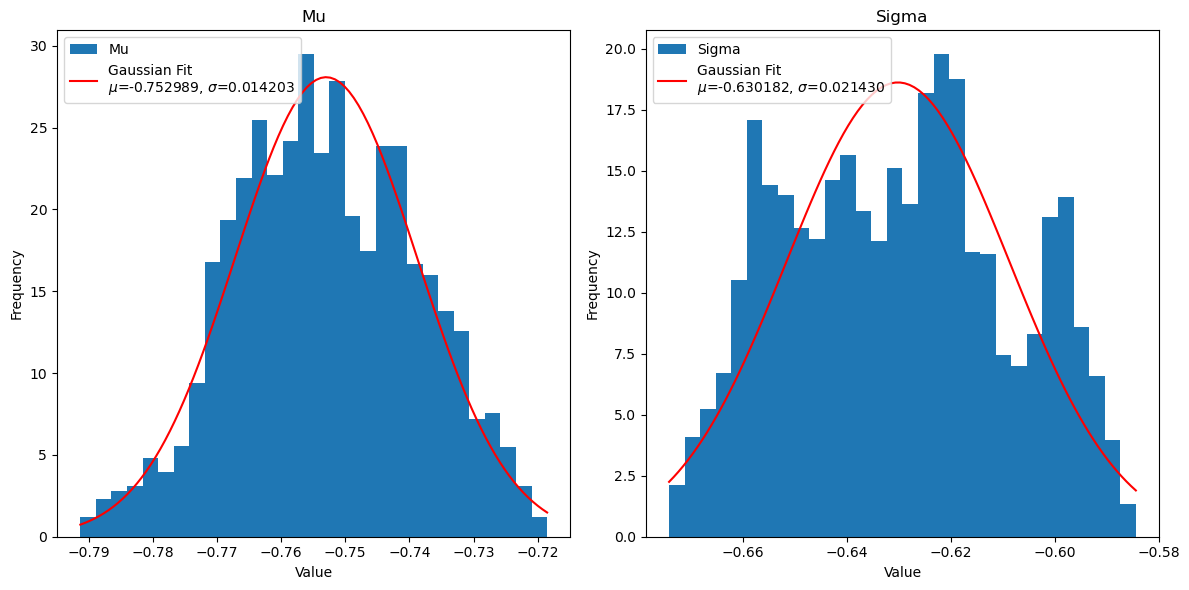

In [5]:
data_1 = np.loadtxt("Exercise08-1/output/histoparameters.out", usecols=0)
data_2 = np.loadtxt("Exercise08-1/output/histoparameters.out", usecols=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure with two subplots

# Plot histogram 1
ax1.hist(data_1, bins=30, density=True, label='Mu')
mu1, std1 = norm.fit(data_1)
x1 = np.linspace(data_1.min(), data_1.max(), 100)
y1 = norm.pdf(x1, mu1, std1)
ax1.plot(x1, y1, 'r-', label='Gaussian Fit\n$\mu$={:.6f}, $\sigma$={:.6f}'.format(mu1, std1))
ax1.set_title('Mu')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.legend()

# Plot histogram 2
ax2.hist(data_2, bins=30, density=True, label='Sigma')
mu2, std2 = norm.fit(data_2)
x2 = np.linspace(data_2.min(), data_2.max(), 100)
y2 = norm.pdf(x2, mu2, std2)
ax2.plot(x2, y2, 'r-', label='Gaussian Fit\n$\mu$={:.6f}, $\sigma$={:.6f}'.format(mu2, std2))
ax2.set_title('Sigma')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.tight_layout()
plt.show()

### Funzione d'onda
Come ultimo risultato, si sono salvate tutte le posizioni esplorate nel campionamento dell'integrale, le quali costituiscono un campionamento della funzione d'onda del ground state. Questo campionamento viene confrontato con la funzione d'onda calcolata numericamente trasformando l'equazione di Schrödinger in un equazione matriciale. Il grafico mostra che i due risultati sono compatibili, seppur non perfettamente.

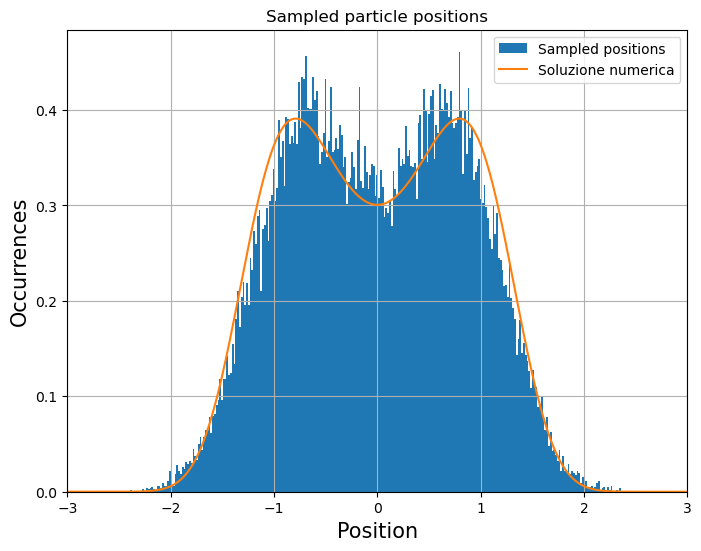

In [6]:
plt.figure(figsize=(8, 6))

pos = np.loadtxt("Exercise08-1/output/pos.out", usecols=(0), delimiter=' ', unpack='true')
plt.hist(pos, 300, density = "true", label = "Sampled positions")
plt.ylabel('Occurrences', fontsize = 15)
plt.xlabel('Position', fontsize = 15)
plt.title("Sampled particle positions")
plt.grid(True)
plt.legend()

#-------------Analytic solution-----------------

def Vpot(x):
    return (x**2 - 2.5)*x**2

hbar = 1
m = 1
a = 10
N = 1000 

x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0]
V = Vpot(x)
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

scale = 0.3
plt.plot(x,(psi[0])**2, label='Soluzione numerica')
plt.xlim(-3,+3)

plt.legend()
plt.show()

### Range di esplorazione
L'esplorazione nello spazio dei parametri, nel caso di range di esplorazione fisso, è fortemente influenzata dalla scelta del range. Infatti si è visto nella sezione [sulle oscillazioni](#osc) che con un range fissato a $\delta_\mu = \delta_\sigma = 0.05$ l'esplorazione giunge a buon termine. Questo range però è stato determinato a tentativi, dato che vari problemi possono occorrere:
- Se il range selezionato è troppo grande, l'algoritmo oscillerà attorno al punto di minimo senza riuscire ad esplorarlo, e quindi non riuscirà ad ottenere un risultato soddisfacente. Questo è mostrato nel primo grafico, dove è stato fissato $\delta_\mu = \delta_\sigma = 0.5$.
- Se invece il range è troppo piccolo, essendo il numero di passi fissato da $\beta$, l'algoritmo non riuscirà a raggiungere il minimo, se il punto di partenza è troppo lontano, e quindi non si riuscirà a raggiungere un risultato. Questo viene mostrato nel secondo grafico, dove $\delta_\mu = \delta_\sigma = 0.001$ e $\mu_0 = \sigma_0 = 1$

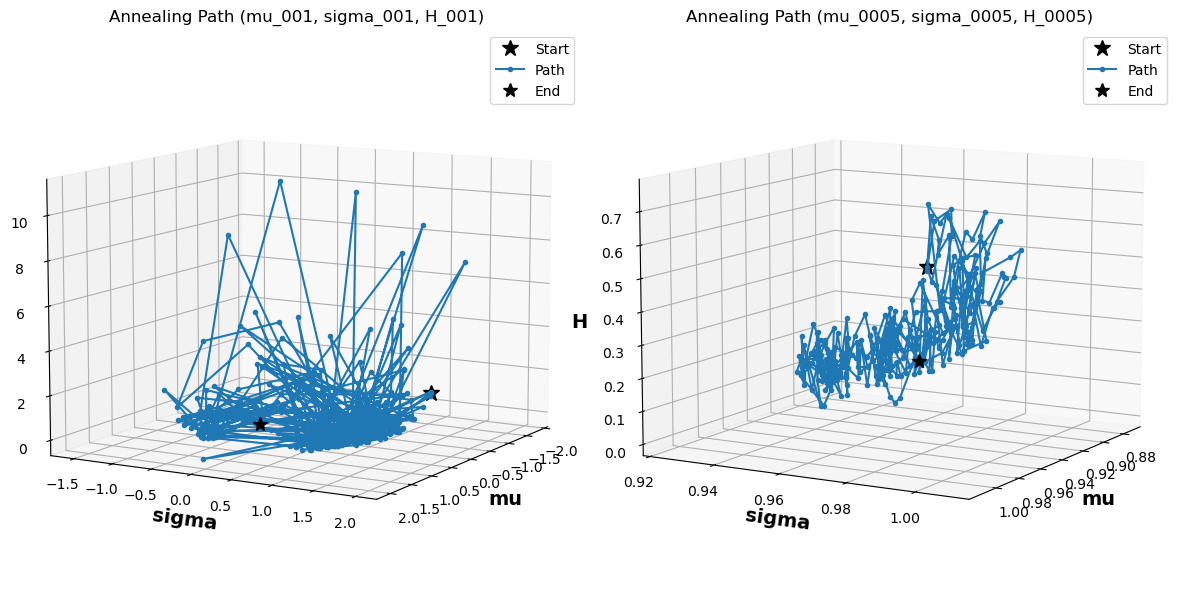

Best mu (0.001) = 0.872943
Best sigma (0.001) = 0.949057
Best H (0.001) = 0.111779
Best mu (0.5) = -0.0769225
Best sigma (0.5) = -0.454526
Best H (0.5) = -0.314845


In [7]:
mu_05, sigma_05, H_05 = np.loadtxt("Exercise08-1/output/traj_2.out", usecols=(1, 2, 3), unpack='true')
mu_0001, sigma_0001, H_0001 = np.loadtxt("Exercise08-1/output/traj_3.out", usecols=(1, 2, 3), unpack='true')

fig = plt.figure(figsize=(12, 6))

# First subplot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(mu_05[0], sigma_05[0], H_05[0], marker='*', markersize=12, color="black", label="Start", linestyle="")
ax1.plot(mu_05, sigma_05, H_05, marker='.', linestyle="-", label="Path")
ax1.plot(mu_05[-1], sigma_05[-1], H_05[-1], marker='*', markersize=10, color="black", label="End", linestyle="")
ax1.set_xlabel('mu', fontweight="bold", fontsize=14)
ax1.set_ylabel('sigma', fontweight="bold", fontsize=14)
ax1.set_zlabel('H', fontweight="bold", fontsize=14)
ax1.set_title('Annealing Path (mu_001, sigma_001, H_001)')
ax1.legend()
ax1.view_init(10, 30)

# Second subplot
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(mu_0001[0], sigma_0001[0], H_0001[0], marker='*', markersize=12, color="black", label="Start", linestyle="")
ax2.plot(mu_0001, sigma_0001, H_0001, marker='.', linestyle="-", label="Path")
ax2.plot(mu_0001[-1], sigma_0001[-1], H_0001[-1], marker='*', markersize=10, color="black", label="End", linestyle="")
ax2.set_xlabel('mu', fontweight="bold", fontsize=14)
ax2.set_ylabel('sigma', fontweight="bold", fontsize=14)
ax2.set_zlabel('H', fontweight="bold", fontsize=14)
ax2.set_title('Annealing Path (mu_0005, sigma_0005, H_0005)')
ax2.legend()
ax2.view_init(10, 30)

plt.tight_layout()
plt.show()

best_mu = mu_0001[-1]
best_sigma = sigma_0001[-1]
best_H = H_0001[-1]

print("Best mu (0.001) =", best_mu)
print("Best sigma (0.001) =", best_sigma)
print("Best H (0.001) =", best_H)

best_mu = mu_05[-1]
best_sigma = sigma_05[-1]
best_H = H_05[-1]

print("Best mu (0.5) =", best_mu)
print("Best sigma (0.5) =", best_sigma)
print("Best H (0.5) =", best_H)